In [1]:
import pandas as pd
import numpy as np
import os
import yaml
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def plot_scatter_with_line(df, x, y, color='red'):
    ax = df.plot.scatter(x=x, y=y, color=color)
    df.plot.line(x=x, y=y, ax=ax, color=color)
    ax.grid(True)

## Directory to read data from

Since this script complements the `run_orbslam.py`. The results are typically stored in the following fashion:

```
eval
└── 2011_09_30_drive_0034
    └── range_perturbations_fc
        ├── run_0
        ├── run_1
        └── run_2
        └── summary.csv
```

In [4]:
# specify path to the output directory
output_folder = os.path.abspath('eval')
# specify the name of the KITTI sequence
KITTI_sequence = '2011_09_30_drive_0034'
# specify the experiment type: 'random_perturbations' or 'range_perturbations'

In [5]:
# path to camera calibration file
camera_config_file =  os.path.abspath('KITTI_parameters/' + KITTI_sequence + '/camera.yaml')
with open(camera_config_file, 'r') as stream:
    camera = yaml.safe_load(stream)
# retrieve camera calibration matrices
K = np.array(camera["K"]).reshape((3, 3))
D = np.array(camera["D"])

In [6]:
experiment_type = 'range_perturbations'
# sepcify which parameters to perturb: 'f' for focal length, 'c' for principle point, 'd' for distortion parameters
# perturb_parameters = ['f', 'c']
perturb_parameters = ['f']
# construct experiment directory name
experiment_name = experiment_type + '_'
for param in perturb_parameters:
    experiment_name = experiment_name + param
output_folder_f = os.path.join(output_folder, KITTI_sequence, experiment_name)

# read panda dataframe
summary_filename = os.path.join(output_folder_f, 'summary.csv')
if os.path.exists(summary_filename):
    summary_df_f = pd.read_csv(summary_filename)
else:
    raise Exception('File not found: %s' % summary_filename)
    
# process data frame to get % deviation
summary_df_f['delta_fx'] =  - (K[0, 0] - summary_df_f['fx']) / K[0, 0] * 100
summary_df_f['delta_cx'] =  - (K[0, 2] - summary_df_f['cx']) / K[0, 2] * 100
summary_df_f['delta_fy'] =  - (K[1, 1] - summary_df_f['fy']) / K[1, 1] * 100
summary_df_f['delta_cy'] =  - (K[1, 2] - summary_df_f['cy']) / K[1, 2] * 100
summary_df_f['delta_k1'] =  - (D[0] - summary_df_f['k1']) / D[0] * 100
summary_df_f['delta_k2'] =  - (D[1] - summary_df_f['k2']) / D[1] * 100
summary_df_f['delta_k3'] =  - (D[4] - summary_df_f['k3']) / D[4] * 100
summary_df_f['delta_p1'] =  - (D[2] - summary_df_f['p1']) / D[2] * 100
summary_df_f['delta_p2'] =  - (D[3] - summary_df_f['p2']) / D[3] * 100

Exception: File not found: /media/storage/my_projects/semantics_miscalib_PLR/plr_miscalib_detection/utils/orbslam_evaluation/eval/2011_09_30_drive_0034/range_perturbations_f/summary.csv

In [52]:
experiment_type = 'range_perturbations'
# sepcify which parameters to perturb: 'f' for focal length, 'c' for principle point, 'd' for distortion parameters
# perturb_parameters = ['f', 'c']
perturb_parameters = ['d']
# construct experiment directory name
experiment_name = experiment_type + '_'
for param in perturb_parameters:
    experiment_name = experiment_name + param
output_folder_d = os.path.join(output_folder, KITTI_sequence, experiment_name)

# read panda dataframe
summary_filename = os.path.join(output_folder_d, 'summary.csv')
if os.path.exists(summary_filename):
    summary_df_d = pd.read_csv(summary_filename)
else:
    raise Exception('File not found: %s' % summary_filename)
    
# process data frame to get % deviation
summary_df_d['delta_fx'] =  - (K[0, 0] - summary_df_d['fx']) / K[0, 0] * 100
summary_df_d['delta_cx'] =  - (K[0, 2] - summary_df_d['cx']) / K[0, 2] * 100
summary_df_d['delta_fy'] =  - (K[1, 1] - summary_df_d['fy']) / K[1, 1] * 100
summary_df_d['delta_cy'] =  - (K[1, 2] - summary_df_d['cy']) / K[1, 2] * 100
summary_df_d['delta_k1'] =  - (D[0] - summary_df_d['k1']) / D[0] * 100
summary_df_d['delta_k2'] =  - (D[1] - summary_df_d['k2']) / D[1] * 100
summary_df_d['delta_k3'] =  - (D[4] - summary_df_d['k3']) / D[4] * 100
summary_df_d['delta_p1'] =  - (D[2] - summary_df_d['p1']) / D[2] * 100
summary_df_d['delta_p2'] =  - (D[3] - summary_df_d['p2']) / D[3] * 100

In [53]:
experiment_type = 'random_perturbations'
# sepcify which parameters to perturb: 'f' for focal length, 'c' for principle point, 'd' for distortion parameters
# perturb_parameters = ['f', 'c']
perturb_parameters = ['f', 'd']
# construct experiment directory name
experiment_name = experiment_type + '_'
for param in perturb_parameters:
    experiment_name = experiment_name + param
output_folder_fd = os.path.join(output_folder, KITTI_sequence, experiment_name)

# read panda dataframe
summary_filename = os.path.join(output_folder_f, 'summary.csv')
if os.path.exists(summary_filename):
    summary_df_fd = pd.read_csv(summary_filename)
else:
    raise Exception('File not found: %s' % summary_filename)
    
# process data frame to get % deviation
summary_df_fd['delta_fx'] =  - (K[0, 0] - summary_df_fd['fx']) / K[0, 0] * 100
summary_df_fd['delta_cx'] =  - (K[0, 2] - summary_df_fd['cx']) / K[0, 2] * 100
summary_df_fd['delta_fy'] =  - (K[1, 1] - summary_df_fd['fy']) / K[1, 1] * 100
summary_df_fd['delta_cy'] =  - (K[1, 2] - summary_df_fd['cy']) / K[1, 2] * 100
summary_df_fd['delta_k1'] =  - (D[0] - summary_df_fd['k1']) / D[0] * 100
summary_df_fd['delta_k2'] =  - (D[1] - summary_df_fd['k2']) / D[1] * 100
summary_df_fd['delta_k3'] =  - (D[4] - summary_df_fd['k3']) / D[4] * 100
summary_df_fd['delta_p1'] =  - (D[2] - summary_df_fd['p1']) / D[2] * 100
summary_df_fd['delta_p2'] =  - (D[3] - summary_df_fd['p2']) / D[3] * 100

## Plotting evaluated trajectory statistics against the perturbed camera parameters

In [54]:
stats = ['rel_trans_stats_rmse_trajlen_100.0', 'rel_rot_stats_rmse_trajlen_100.0']

/home/mayankm/.virtualenvs/plr_pytorch/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


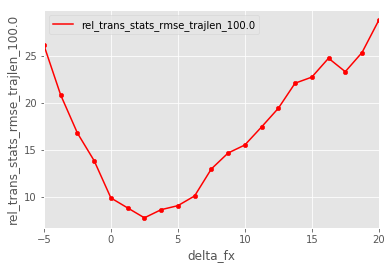

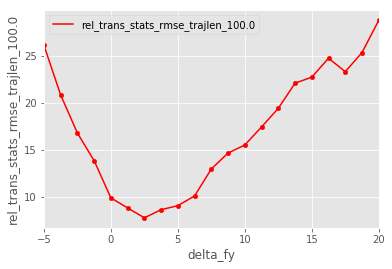

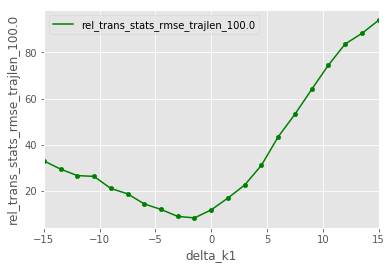

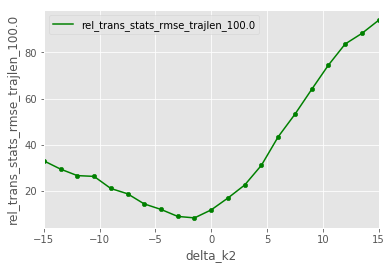

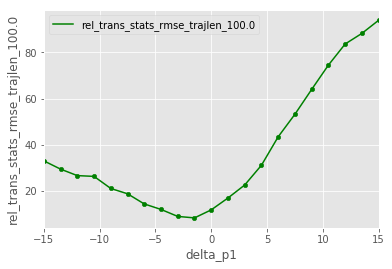

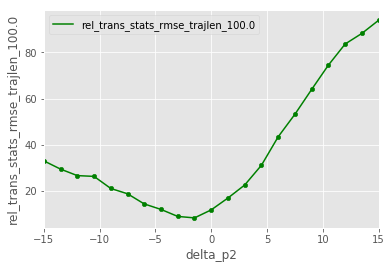

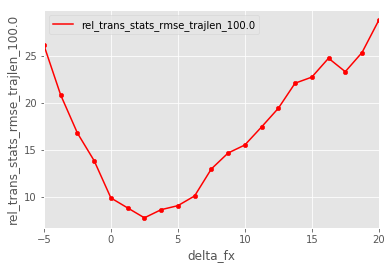

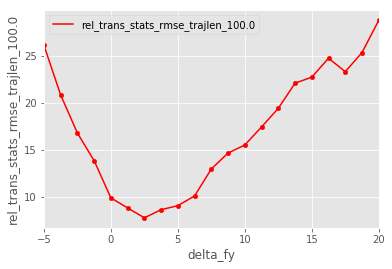

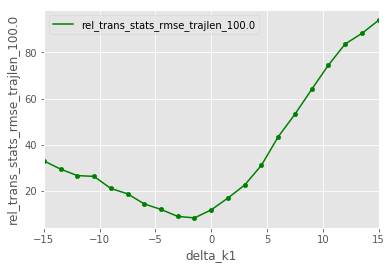

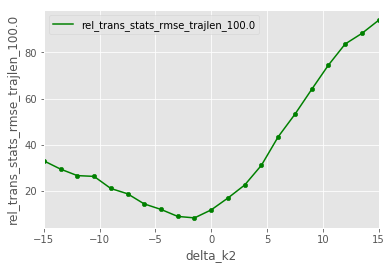

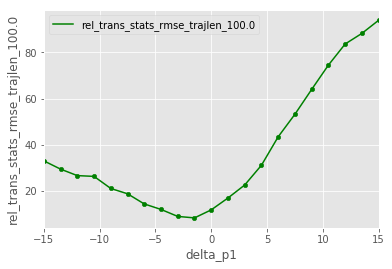

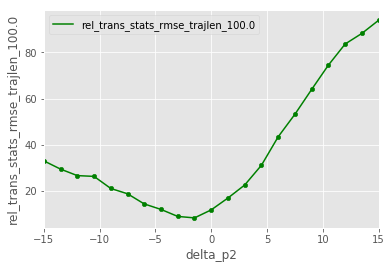

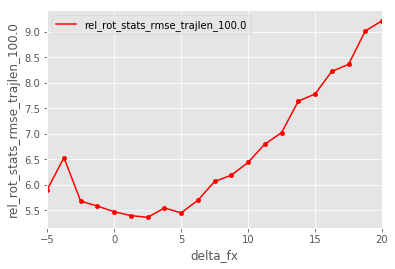

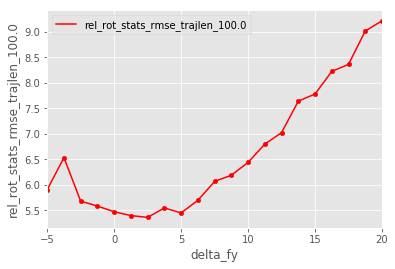

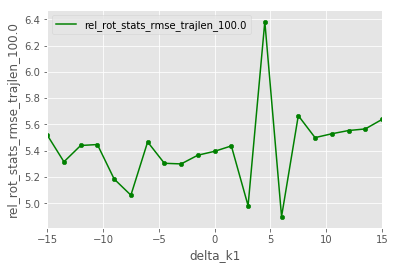

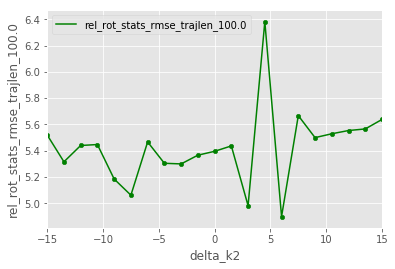

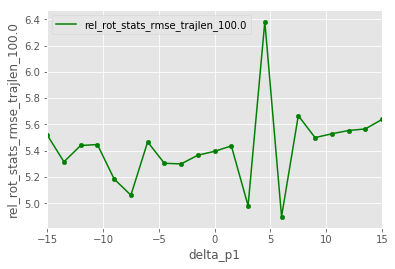

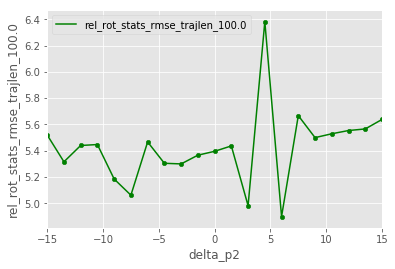

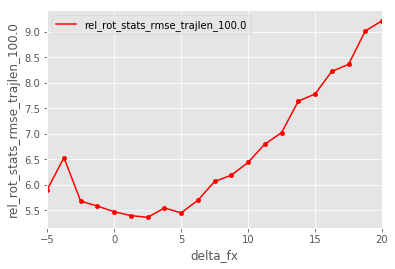

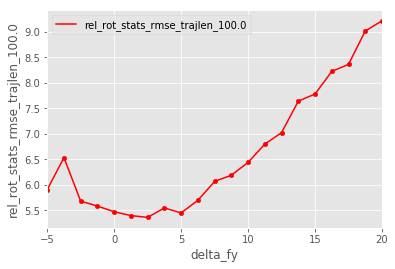

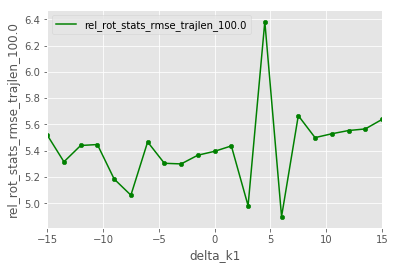

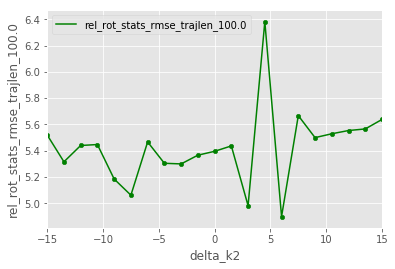

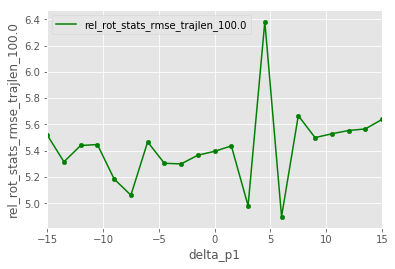

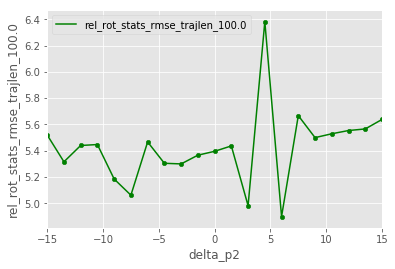

In [55]:
for stat in stats:
    for param in perturb_parameters:
        if summary_df_f is not None:
            plot_scatter_with_line(summary_df_f, x='delta_fx',y=stat,color='red')
            plot_scatter_with_line(summary_df_f, x='delta_fy',y=stat,color='red')
        if summary_df_d is not None:
            plot_scatter_with_line(summary_df_d, x='delta_k1',y=stat,color='green')
            plot_scatter_with_line(summary_df_d, x='delta_k2',y=stat,color='green')
            plot_scatter_with_line(summary_df_d, x='delta_p1',y=stat,color='green')
            plot_scatter_with_line(summary_df_d, x='delta_p2',y=stat,color='green')

## Plotting rectification map statistics against the perturbed camera parameters

In [56]:
# name of columns to plot
stats = ['d_avg']

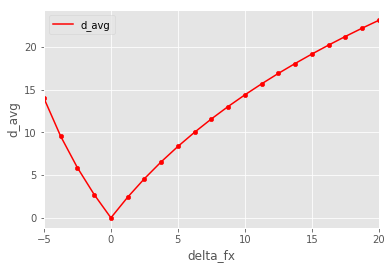

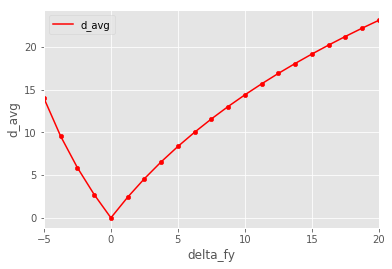

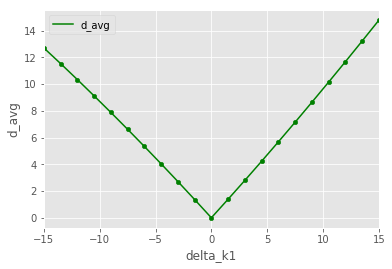

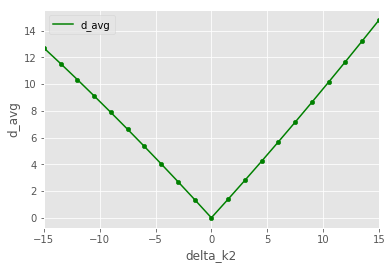

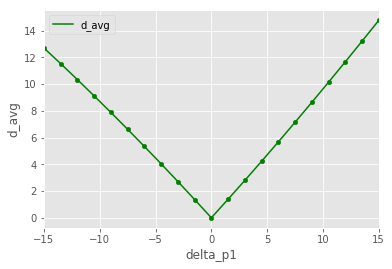

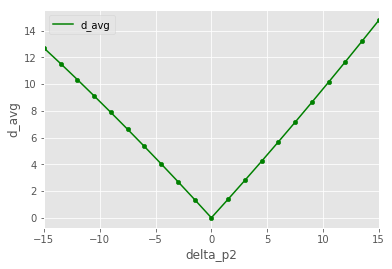

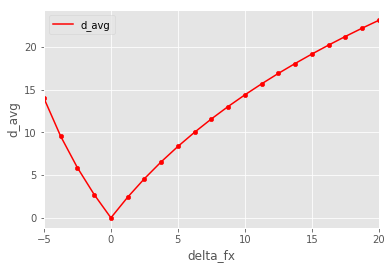

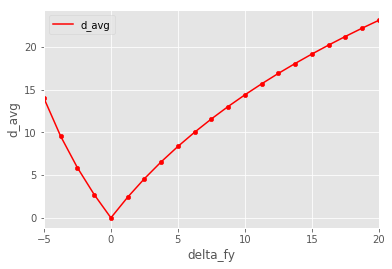

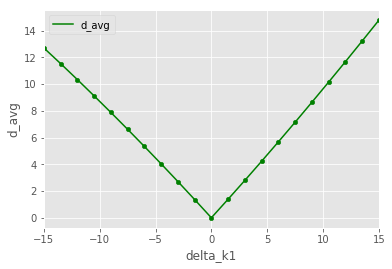

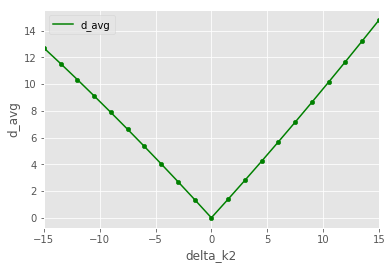

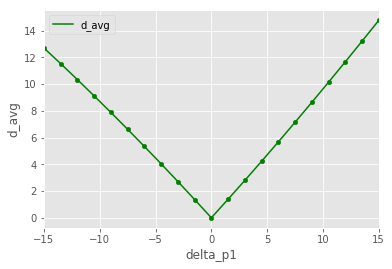

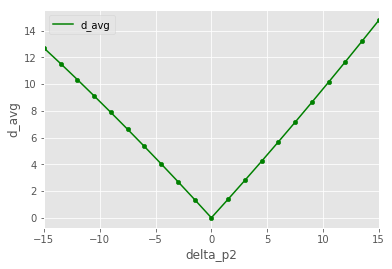

In [57]:
for stat in stats:
    for param in perturb_parameters:
        if summary_df_f is not None:
            plot_scatter_with_line(summary_df_f, x='delta_fx',y=stat,color='red')
            plot_scatter_with_line(summary_df_f, x='delta_fy',y=stat,color='red')
        if summary_df_d is not None:
            plot_scatter_with_line(summary_df_d, x='delta_k1',y=stat,color='green')
            plot_scatter_with_line(summary_df_d, x='delta_k2',y=stat,color='green')
            plot_scatter_with_line(summary_df_d, x='delta_p1',y=stat,color='green')
            plot_scatter_with_line(summary_df_d, x='delta_p2',y=stat,color='green')

## Plotting trajectory evaluation statistics against reprojection error

In [59]:
# name of axes to plot
y_stats = ['abs_e_trans_stats_mean', 'abs_e_rot_stats_mean', 'rel_trans_stats_rmse_trajlen_100.0', 'rel_rot_stats_rmse_trajlen_100.0']
x_stats = ['d_avg']

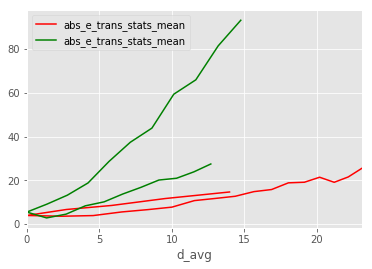

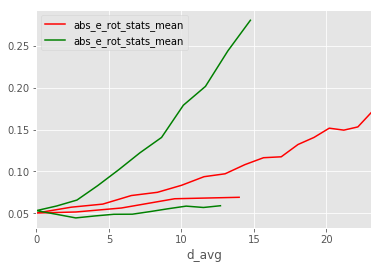

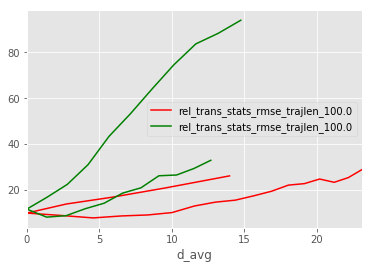

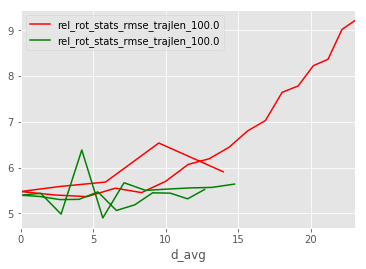

In [60]:
for y_stat in y_stats:
    for x_stat in x_stats:
        ax = summary_df_f.plot(kind='line', x=x_stat,y=y_stat,color='red')
        summary_df_d.plot(kind='line', ax=ax, x=x_stat,y=y_stat,color='green')

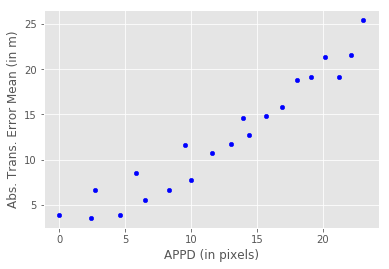

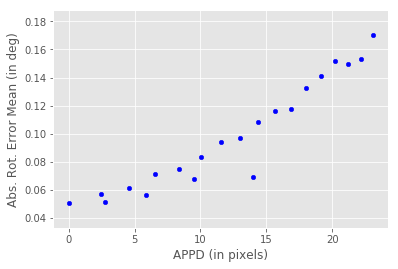

In [62]:
plt.style.use('ggplot')
# name of axes to plot
y_stats = ['abs_e_trans_stats_mean', 'abs_e_rot_stats_mean']
y_stats_label = ['Abs. Trans. Error Mean (in m)', 'Abs. Rot. Error Mean (in deg)']

labels = dict(zip(y_stats, y_stats_label))

x_stats = ['d_avg']

for y_stat in y_stats:
    for x_stat in x_stats:
        ax = summary_df_fd.plot(kind='scatter', x=x_stat,y=y_stat,color='blue')
        ax.set_xlabel("APPD (in pixels)")
        ax.set_ylabel(labels[y_stat])
        ax.get_figure().savefig(y_stat + '.pdf')